In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy.stats.stats import pearsonr
from sklearn import preprocessing
import seaborn as sns
import datetime
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet import Prophet
from fbprophet.plot import plot_cross_validation_metric

ModuleNotFoundError: No module named 'fbprophet'

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction(Удовлетворенность жизнью).
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.(Социальная поддержка)
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.(ВВП)
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.(Продолжительность жизни)

Посмотреть первые несколько рядов таблицы

In [3]:
df.head(15)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

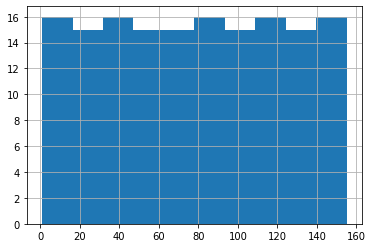

In [4]:
df.Freedom.hist()

Это равномерное распределение

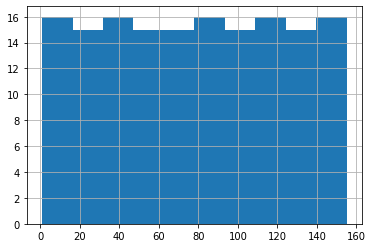

In [5]:
df['Positive affect'].hist()

Это равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, размах для колонки Freedom

In [70]:
print('Сводная статистика по колонке Freedom')
print('Медиана: ', statistics.median(df['Freedom']))
try:
    print('Значение моды: ', statistics.mode(df['Freedom']))
except statistics.StatisticsError:
    print('Значение моды с помощью стандартной библиотеки не может быть найдено - ')
    print('найдено более одного наиболее распространненного элемента ')
print('Cтандартное отклонение: ', statistics.pstdev(df['Freedom']))
print('Дисперсия: ', statistics.pvariance(df['Freedom']))
print('Минимум: ', min(df['Freedom']))
print('Максимум: ', max(df['Freedom']))


Сводная статистика по колонке Freedom
Медиана:  77.5
Значение моды с помощью стандартной библиотеки не может быть найдено - 
найдено более одного наиболее распространненного элемента 
Cтандартное отклонение:  45.032395746469746
Дисперсия:  2027.9166666666667
Минимум:  0.0
Максимум:  155.0


Почему нельзя найти моду?

In [71]:
try:
    print('Значение моды: ', statistics.mode(df['Freedom']))
except statistics.StatisticsError:
    print('Значение моды с помощью стандартной библиотеки не может быть найдено - ')
    print('найдено более одного наиболее распространненного элемента ')

Значение моды с помощью стандартной библиотеки не может быть найдено - 
найдено более одного наиболее распространненного элемента 


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

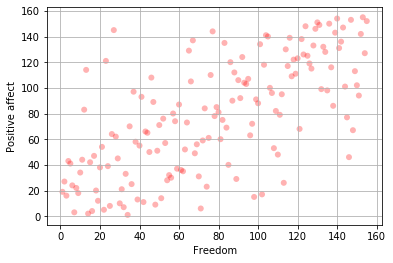

In [72]:
Freedom = df['Freedom']
Positive_affect = df['Positive affect']
fig, ax = plt.subplots()
ax.scatter(Freedom, Positive_affect, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.show()

In [89]:
df['Positive affect'].fillna(0, inplace=True)
df['Positive affect'] = df['Positive affect'].astype(np.float16)
corr, p_value = pearsonr(df['Freedom'], df['Positive affect'])
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: 0.6878506740844941


Знак коэффициента корреляции Пирсона говорит о прямой зависимости. Знак '-'    укаызвал бы на обратную зависимость

# Построить матрицу корреляций для всех колонок таблицы

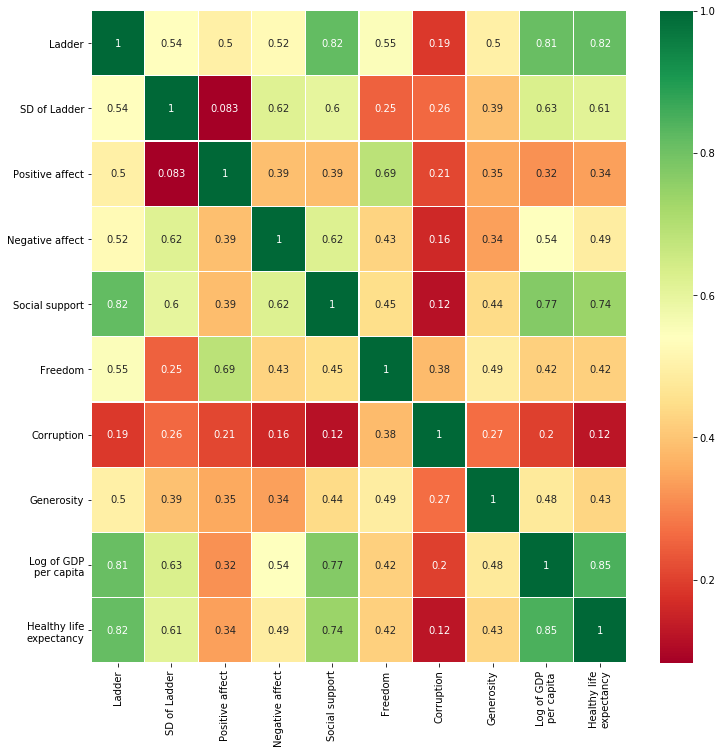

In [95]:

sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()


В данном датасете некоторые атрибуты значительно коррелируют. Какие? Почему?

Атрибуты с высокой корреляцией:
    Log of GDP\nper capita - Healthy life\nexpectancy :  При высоком ВВП на душу населения человеческаяф жизнь становится существенно дороже , соответсвенно смерть человека для экономики страны - больший ущерб. И сами люди в странах с высоким ВВП более бережно отноятся к своему здороью.  В связи с этим в странах с высоким ВВП развит тренд (пропогандирование здорового образа жизни, да и сами люди выше ценят свою жизнь) на улучшение качества доровья, отсюда и следует  высокая корреляция между ВВП на душу населения и ожидаемой продолжительностью жизни;  
    Ladder - Social support : корреляция между показателем удовлетворенностью жизнью и соцподдержкой велика, так как странах с высокой соцподдержкой человек чувствует себя более защищенным.;
    Ladder - Log of GDP\nper capita : корреляция между показателем удовлетворенностью жизнью и уровенм ВВП велика, так как прии высоком ВВП на дущу населения средний доход в государстве становится выше - это и влияет на увеличение показателя удовлетворенностью жизнью;
    Ladder - Healthy life\nexpectancy : корреляция между показателем удовлетворенностью жизнью и ожидаемой продолжительностью жизни велика, так как увелиение продолжительности жизни говорит обычно о высоком качестве жизни, медицины, что ведет к увелиению  показателя удовлетворенностью жизнью.

Загрузить таблицу цен на авокадо: 
Исторические данные по ценам авокадо и объему продаж на нескольких рынках США.
Некоторые соответствующие столбцы в наборе данных:

Date - дата наблюдения
AveragePrice - средняя цена одного авокадо
type - обычный или органический
year - год
Region - город или район наблюдения
Total Volume - Общее количество проданных авокадо
4046 - Общее количество проданных авокадо с PLU 4046
4225 - Общее количество проданных авокадо с PLU 4225
4770 - Общее количество проданных авокадо с PLU 4770

In [20]:
import io
import requests

df=pd.read_csv(r'D:\avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

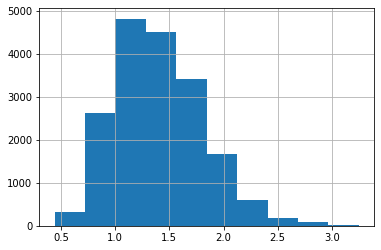

In [23]:
df.AveragePrice.hist()

Частотный график колонки AveragePrice указывает на нормальное распределение.

In [ ]:
Найти корреляции между признаками

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, размах для колонок

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

# построим графики корреляций
Что за функция Dropna?

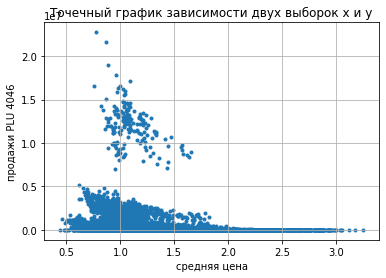

In [35]:

avocado_sold = df['4046'].dropna()
avg_price = df['AveragePrice'].dropna()
plt.xlabel('средняя цена')
plt.ylabel('продажи PLU 4046')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(avg_price, avocado_sold, marker='.')

from scipy.stats import pearsonr


In [ ]:
Сгруппируем по типу

In [34]:
types=df.groupby('type')['Total Volume'].sum()

Что показвает диаграмма?

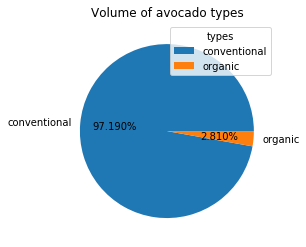

In [33]:

values=[types['conventional'],types['organic']]
labels=['conventional','organic']
plt.pie(values,labels=labels,autopct='%.3f%%')
plt.legend(title='types',loc='best')
plt.title('Volume of avocado types');

In [38]:
Сравнить средние колонок -критерий Стьюдента? 
4046 - Общее количество проданных авокадо с PLU 4046
4225 - Общее количество проданных авокадо с PLU 4225
4770 - Общее количество проданных авокадо с PLU 4770

SyntaxError: invalid syntax (<ipython-input-38-0415264131c6>, line 1)